# **Convolution Neural Networks for Image Classification**

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing and Visulaising the MNIST Dataset

In [168]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [169]:
x_train.shape


(60000, 28, 28)

In [170]:
x_test.shape

(10000, 28, 28)

In [171]:
single_image=x_train[0]

In [172]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

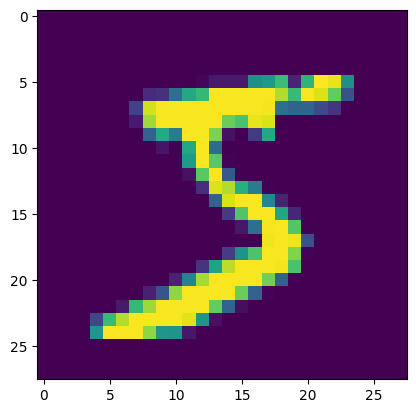

In [173]:
plt.imshow(single_image)

In [174]:
single_image.shape

(28, 28)

# **Preprocessing our Data**

In [175]:
from tensorflow.keras.utils import to_categorical

### Preprocessing Y data

In [176]:
y_train.shape

(60000,)

In [177]:
y_test.shape


(10000,)

In [178]:
y_example = to_categorical(y_train)

In [179]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [180]:
y_example.shape

(60000, 10)

In [181]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

### Preprocessing X data

In [182]:
print(single_image.max())
single_image.min()

255


0

In [183]:
x_train = x_train/255
x_test = x_test/255

In [184]:
scaled_image=x_train[0]
x_train.max()

1.0

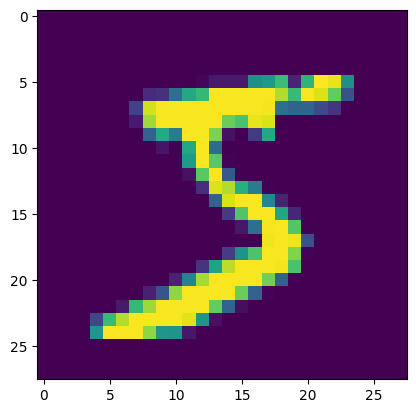

In [185]:
plt.imshow(scaled_image)

# **Reshaping Our Data**

In [186]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [187]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [188]:
x_train.shape

(60000, 28, 28, 1)

In [189]:
x_test.shape

(10000, 28, 28, 1)

# **Creating our  Model**

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [191]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu')) # Pass a Conv2D object to the add method
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [192]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [193]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# **Training Our Model**

In [194]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1374 - accuracy: 0.9595 - val_loss: 0.0579 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0454 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0444 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.0385 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0071 - accuracy: 0.9975 - val_loss: 0.0480 -

# **Evaluating Our Model**

In [195]:
model.metrics_names

['loss', 'accuracy']

In [196]:
losses = pd.DataFrame(model.history.history)

In [197]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.137424,0.959467,0.057887,0.9812
1,0.047447,0.985450,0.045393,0.9859
2,0.029688,0.990800,0.044442,0.9846
3,0.021007,0.993100,0.042291,0.9865
4,0.014874,0.995467,0.038500,0.9882


<Axes: >

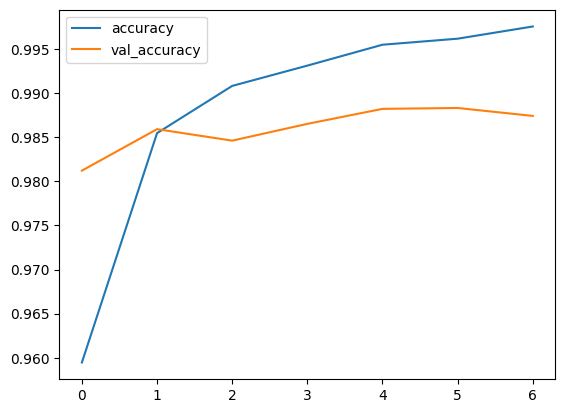

In [198]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

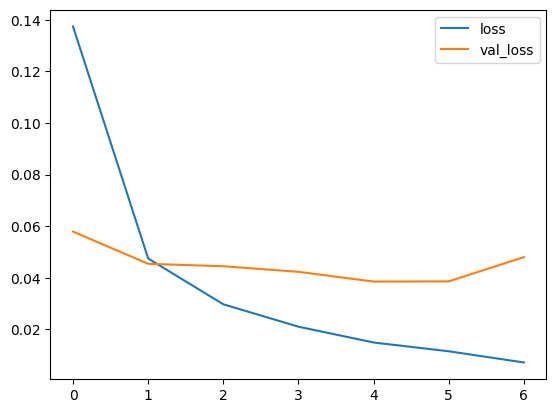

In [199]:
losses[['loss','val_loss']].plot()

In [200]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04797396436333656, 0.9873999953269958]


In [215]:
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
predictions = model.predict(x_test)
predictions1 = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [217]:
y_cat_test.shape

(10000,)

In [218]:
y_cat_test[0]

7

In [219]:
predictions1.shape


(10000, 10)

In [221]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_cat_test is in one-hot encoded format and predictions are probabilities
#y_cat_test = np.argmax(y_cat_test, axis=1)
predictions1 = np.argmax(predictions1, axis=1)

print(classification_report(y_cat_test, predictions1))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [222]:
confusion_matrix(y_cat_test,predictions1)

array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1131,    0,    0,    1,    1,    1,    0,    1,    0],
       [   2,    4, 1018,    0,    1,    0,    1,    4,    2,    0],
       [   0,    0,    2, 1002,    0,    2,    0,    0,    2,    2],
       [   0,    0,    0,    0,  976,    0,    2,    0,    0,    4],
       [   2,    0,    0,    6,    0,  879,    1,    0,    1,    3],
       [   3,    3,    0,    0,    1,    3,  946,    0,    2,    0],
       [   1,    8,   12,    1,    1,    0,    0,  994,    1,   10],
       [   2,    2,    2,    0,    2,    1,    0,    0,  961,    4],
       [   2,    2,    0,    0,    7,    6,    0,    1,    0,  991]])

<Axes: >

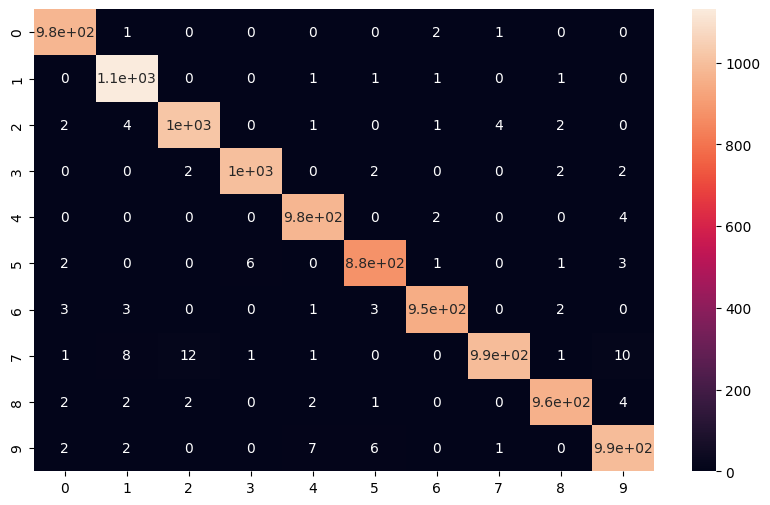

In [223]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_cat_test,predictions1),annot=True)

#**Predicting an Image**

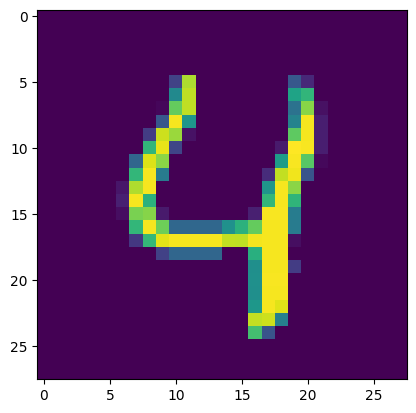

In [224]:
my_number=x_test[4]
plt.imshow(my_number.reshape(28,28))

In [225]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 22ms/step


array([[1.3963787e-13, 9.3259611e-10, 2.0156938e-12, 1.5279724e-13,
        9.9999988e-01, 6.7694941e-14, 2.1510887e-11, 3.5463002e-12,
        2.6159730e-10, 7.0799807e-08]], dtype=float32)

In [227]:
import numpy as np

# Example prediction output
prediction = np.array([[1.3963787e-13, 9.3259611e-10, 2.0156938e-12, 1.5279724e-13,
                        9.9999988e-01, 6.7694941e-14, 2.1510887e-11, 3.5463002e-12,
                        2.6159730e-10, 7.0799807e-08]])

# Get the index of the highest probability
predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)


Predicted class: 4


# **GREAT ! OUR CONVOLUTION NEURAL NETWORK IS WORKING COMPLETELY FINE**